<a href="https://colab.research.google.com/github/shauryanegi/tensorflow-deep-learning/blob/gh-pages/01_neural_network_regression_in_tensorflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem in our case, we're going to simplify it: predicting a numerical variable based on some combination of variables, even shorter....predicting a number.

In [ ]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.5.0


## Creating a data to view and fit

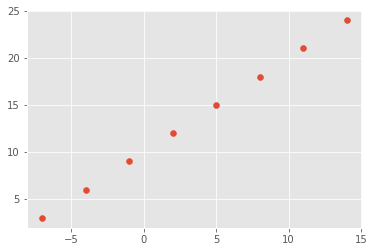

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.style.use("ggplot")
plt.scatter(X, y)


In [ ]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

# Input and output shapes

In [ ]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])

house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
X[1], y[1]

(-4.0, 6.0)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
#Turn our NumPy arrays into tensors
X = tf.cast(tf.constant(X), dtype = tf.float32)
y = tf.cast(tf.constant(y), dtype = tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

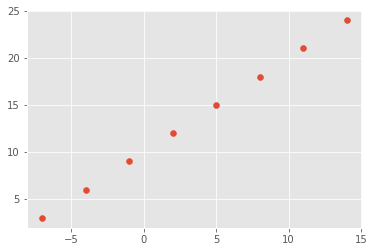

In [ ]:
plt.scatter(X,y)

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of the deep learning model.

2. **Compiling a model** - Define the loss function (in other words, the function which tells our how model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).

3. Fitting the model - letting the model try to find patterns between X and y (features and labels)

In [ ]:
# Set random seed

tf.random.set_seed(42)

# 1. Create a model using the Sequential API

model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(1))

# 2. Compile the model

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(), metrics=['mae'])  # mean absolute error

   # Stochastic Gradient Descent.

# 3. Fit the model

model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 236ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 8ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 6ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 10ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 3ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
# Check out X and y
X , y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Try to make a prediction using our model
y_pred = model.predict([17.0])

In [ ]:
y_pred , y_pred + 11

(array([[12.716021]], dtype=float32), array([[23.71602]], dtype=float32))

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - We might add more layers, increase the number of hidden units (also called neurons) within each of the hidden layers, called the activation function of each layer.

2. **Compiling a model** - We might change the optimization function or perhaps the **learning rate** of optimization function.

3. **Fitting a model** - Here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from)

In [ ]:
## Increasing the number of epochs

# Set random seed

tf.random.set_seed(42)

# 1. Create a model using the Sequential API

model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(1))

# 2. Compile the model

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(), metrics=['mae'])  # mean absolute error

   # Stochastic Gradient Descent.

# 3. Fit the model

model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 264ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 10.4448 - mae: 10.4448
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 10.3123 - mae: 10.3123
Epoch 11/100
1/1 [==============================] - 0s 3m

In [ ]:
# Try to make a prediction using our model
y_pred = model.predict([17.0])

In [ ]:
y_pred #much better than before

array([[30.158512]], dtype=float32)

In [ ]:
# Let us try more things now to improve the model

# 1. Create a model with Sequential API

model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(100, activation = 'relu'))

model.add(tf.keras.layers.Dense(1))

# 2. Compile our model

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics=['mae'])

# 3. Compile the model

model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 307ms/step - loss: 13.9468 - mae: 13.9468
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 5.6308 - mae: 5.6308
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 8.5388 - mae: 8.5388
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 8.0333 - mae: 8.0333
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 5.1341 - mae: 5.1341
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 3.8633 - mae: 3.8633
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 5.7742 - mae: 5.7742
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 5.8511 - mae: 5.8511
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 4.4557 - mae: 4.4557
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 3.7069 - mae: 3.7069
Epoch 11/100
1/1 [==============================] - 0s 7ms/step - loss: 4.5

In [ ]:
# Try to make a prediction using our model

y_pred = model.predict([17.0]) 

In [ ]:
y_pred ##The model is overfitting and therefore it is giving a poor result.

array([[28.32901]], dtype=float32)

### Evaluating a model 

A typical workflow you'll go through when building neural networks is:

Build a model -> evaluate it -> build (tweak) a model -> evaulate it -> build (tweak) a model -> evaluate it...

The tweaking comes from maybe not building a model from scratch but adjusting an existing one.

When it comes to evaluation, you'll want to remember the words: "visualize, visualize, visualize."

This is because you're probably better looking at something (doing) than you are thinking about something.

It's a good idea to visualize:

**The data** - what data are you working with? What does it look like?

**The model itself** - what does the architecture look like? What are the different shapes?

**The training of a model** - how does a model perform while it learns?

**The predictions of a model** - how do the predictions of a model line up against the ground truth (the original labels)?

Let's start by visualizing the model.

But first, we'll create a little bit of a bigger dataset and a new model we can use (it'll be the same as before, but the more practice the better)

In [ ]:
# Make a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

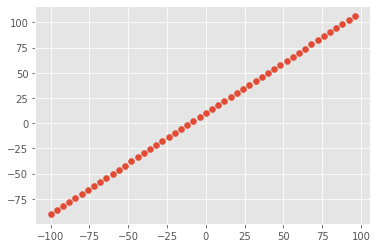

In [ ]:
# Visualize the data
plt.scatter(X,y);

### The 3 sets...

Each set serves a specific purpose:

**Training set** - the model learns from this data, which is typically 70-80% of the total data available (like the course materials you study during the semester).

**Validation set** - the model gets tuned on this data, which is typically 10-15% of the total data available (like the practice exam you take before the final exam).

**Test set** - the model gets evaluated on this data to test what it has learned, it's typically 10-15% of the total data available (like the final exam you take at the end of the semester).

For now, we'll just use a training and test set, this means we'll have a dataset for our model to learn on as well as be evaluated on.

We can create them by splitting our X and y arrays.

🔑 Note: When dealing with real-world data, this step is typically done right at the start of a project (the test set should always be kept separate from all other data). We want our model to learn on training data and then evaluate it on test data to get an indication of how well it generalizes to unseen examples.

In [ ]:
#Check the number of samples we have
len(X)

50

In [ ]:
#Split the data into training and test sets

X_train = X[:40] #First 40 examples (80% of the data)
y_train = y[:40]

X_test = X[40:] # Last 10 Examples (20% of data)
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

## Visualizing the data

Now we've got our training and test data, it's a good idea to visualize it.

Let's plot it with some nice colours to differentiate what's what.

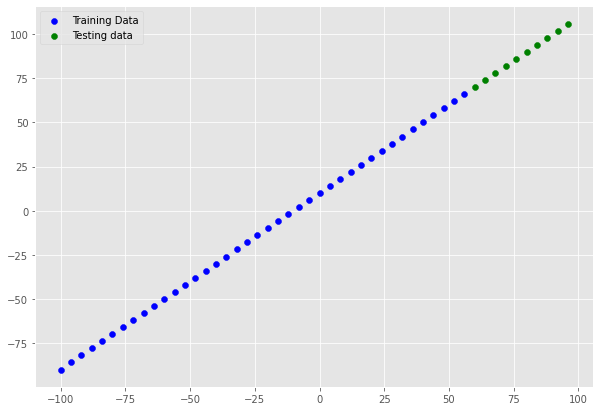

In [ ]:
plt.figure(figsize = (10,7))

#Plot training data to blue
plt.scatter(X_train,y_train, c ='b', label = 'Training Data')

#Plot test data to green
plt.scatter(X_test,y_test, c='g', label = 'Testing data')
plt.legend();

In [ ]:
#Let's have a look at how to build a neural network for our data

# 1. Create a model

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

# 2. Compile a model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate= 0.01),
              metrics = ['mae'])

# 3. Fit the model
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 8.1530 - mae: 8.1530
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 7.8493 - mae: 7.8493
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 7.6240 - mae: 7.6240
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 7.5539 - mae: 7.5539
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 7.5999 - mae: 7.5999
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 7.7012 - mae: 7.7012
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 7.7001 - mae: 7.7001
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 7.6143 - mae: 7.6143
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 7.5518 - mae: 7.5518
Epoch 10/100
2/2 [==============================] - 0s 2ms/step - loss: 7.5005 - mae: 7.5005
Epoch 11/100
2/2 [==============================] - 0s 3ms/step - loss: 7.4694 

## Visualizing the model

In [ ]:
model.summary()

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [ ]:
# Let's create a model which builds automatically by defining the input_shape n the first layer

tf.random.set_seed(42)

# Create a model

model = tf.keras.Sequential(name= 'Model1')
(model.add(tf.keras.layers.Dense(10, input_shape=[1], name='input_layer'
 )), )
model.add(tf.keras.layers.Dense(1, name='output_layer'))

# Compile a model

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

# Fit a model

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 24.7643 - mae: 24.7643
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 19.0262 - mae: 19.0262
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 13.5870 - mae: 13.5870
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 8.8757 - mae: 8.8757
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 8.6327 - mae: 8.6327
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 10.8266 - mae: 10.8266
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 11.7706 - mae: 11.7706
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 11.8001 - mae: 11.8001
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 11.1962 - mae: 11.1962
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 10.0506 - mae: 10.0506
Epoch 11/100
2/2 [==============================] - 0s 5ms/step

In [ ]:
#Get a summary of our model
model.summary()

Model: "Model1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - Total number of parameters in the model
* Trainable parameters - These are the parameters (patterns) that model can update as it trains
* Non Trainable params - These parameters are not updated during training. (This is typical when you bring in already learn patterns from other models during transfer learning)

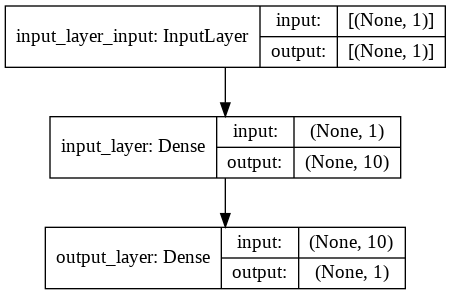

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model = model, show_shapes = True)

### Visualizing our models predictions

To visualize predictions, it is good to plot them against the ground truth labels.

Often you'll see this in the form of y_test vs. y_pred (ground truth vs. predictions).

First, we'll make some predictions on the test data (X_test), remember the model has never seen the test data.

In [ ]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

array([[ 72.42797 ],
       [ 76.58641 ],
       [ 80.74485 ],
       [ 84.90329 ],
       [ 89.06173 ],
       [ 93.22018 ],
       [ 97.378624],
       [101.537056],
       [105.695496],
       [109.853935]], dtype=float32)

In [ ]:
# Let's create a plotting function


def plot_predictions(
    train_data=X_train,
    train_labels=y_train,
    test_data=X_test,
    test_labels=y_test,
    predictions=y_pred,
    ):
    """
  Plots training data, test data and compares them

  """

    plt.figure(figsize=(10, 7))
    plt.style.use('ggplot')

  # Plot training data in blue

    plt.scatter(train_data, train_labels, c='b', label='Training data')

  # Plot training data in green

    plt.scatter(test_data, test_labels, c='g', label='Test data')

  # Plot models predictions in red

    plt.scatter(test_data, predictions, c='r', label='Predictions')

    plt.legend()

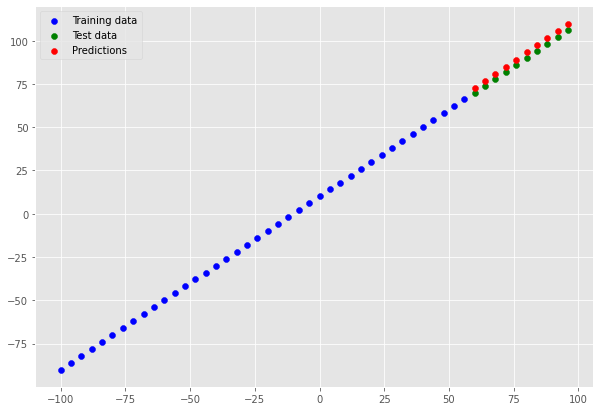

In [ ]:
plot_predictions(train_data=X_train, train_labels=y_train,
                 test_data=X_test, test_labels=y_test,
                 predictions=y_pred);

### Evaluating our models prediction with regression evaluation metrics

Depending on problem you are working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics would be:

* MAE - Mean absolute error "On average, how wrong is each of my model's prediction errors"

* MSE - Mean square error, "Square the average errors"


In [ ]:
#Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 30ms/step - loss: 3.1410 - mae: 3.1410


[3.1409544944763184, 3.1409544944763184]

In [ ]:
#Calculate the mean absolute error using numpy
np.mean(np.subtract(y_pred,y_test))

3.1409538269042967

In [ ]:
#Calculate the mean squared error
mse = tf.metrics.mse(y_true= y_test,
                     y_pred = tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=10.072696>

In [ ]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true= y_true,
                                        y_pred = y_pred)
  
def mse(y_true,y_pred):
  return tf.metrics.mean_squared_error(y_true= y_true,
                                       y_pred = y_pred)

### Running expiriments to improve our model

After seeing the evaluation metrics and the predictions your model makes, it's likely you'll want to improve it.

Again, there are many different ways you can do this, but 3 of the main ones are:

Get more data - get more examples for your model to train on (more opportunities to learn patterns).

Make your model larger (use a more complex model) - this might come in the form of more layers or more hidden units in each layer.

Train for longer - give your model more of a chance to find the patterns in the data.

Since we created our dataset, we could easily make more data but this isn't always the case when you're working with real-world datasets.

So let's take a look at how we can improve our model using 2 and 3.

To do so, we'll build 3 models and compare their results:

model_1 - same as original model, 1 layer, trained for 100 epochs.

model_2 - 2 layers, trained for 100 epochs.

model_3 - 2 layers, trained for 500 epochs.

In [ ]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [ ]:
#Set random seed
tf.random.set_seed(42)

#Build a model
model_1 = tf.keras.Sequential()
model_1.add(tf.keras.layers.Dense(1))

#Compile a model
model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate= 0.01),
                metrics = ['mae'])

#Fit the model
model_1.fit(X_train, y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 17.1341 - mae: 17.1341
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 16.3267 - mae: 16.3267
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 15.5698 - mae: 15.5698
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 14.8027 - mae: 14.8027
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 14.0456 - mae: 14.0456
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 13.3200 - mae: 13.3200
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 12.5875 - mae: 12.5875
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 11.8444 - mae: 11.8444
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 11.1684 - mae: 11.1684
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 10.5400 - mae: 10.5400
Epoch 11/100
2/2 [==============================] - 0s 3ms/

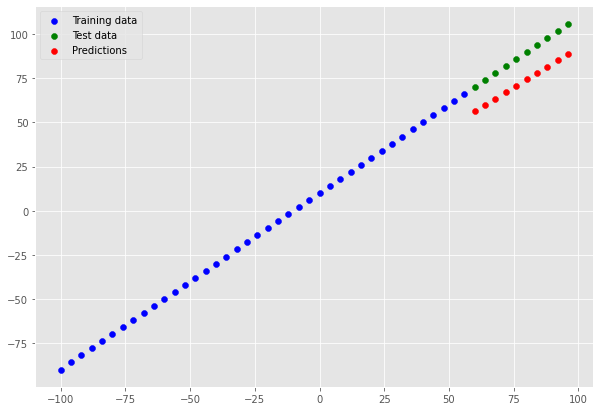

In [ ]:
#Make and plot predictions
y_preds_1 = model_1.predict(X_test)

plot_predictions(train_data = X_train,
                 train_labels = y_train,
                 test_data = X_test,
                 test_labels = y_test,
                 predictions = y_preds_1)

In [ ]:
#Calculate model_1 evaluation
mae_1 = mae(y_test, tf.squeeze(y_preds_1))
mse_1 = mse(y_test, tf.squeeze(y_preds_1))
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=15.4527645>,
 <tf.Tensor: shape=(), dtype=float32, numpy=239.99292>)

In [ ]:
#Set random seed
tf.random.set_seed(42)

#Build a model
model_2 = tf.keras.Sequential()
model_2.add(tf.keras.layers.Dense(10, activation ='relu')),
model_2.add(tf.keras.layers.Dense(1, activation= 'relu')),

#Compile a model
model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate= 0.01),
                metrics = ['mae'])

# Fit the model
model_2.fit(X_train, y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 42.9790 - mae: 42.9790
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 39.9109 - mae: 39.9109
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 36.9743 - mae: 36.9743
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 33.9349 - mae: 33.9349
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 31.0283 - mae: 31.0283
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 30.0460 - mae: 30.0460
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 29.1513 - mae: 29.1513
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 28.3830 - mae: 28.3830
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 28.3122 - mae: 28.3122
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 28.4625 - mae: 28.4625
Epoch 11/100
2/2 [==============================] - 0s 3ms/

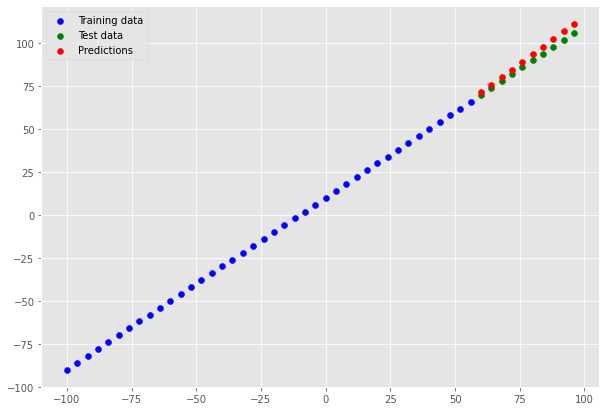

In [ ]:
#Make and plot predictions
y_preds_2 = model_2.predict(X_test)

plot_predictions(train_data= X_train,
                 train_labels = y_train,
                 test_data = X_test,
                 test_labels = y_test,
                 predictions = y_preds_2)

In [ ]:
# Calculate model_2 evaluation metrics 
mae_2 = mae(y_test, tf.squeeze(y_preds_2))
mse_2 = mse(y_test, tf.squeeze(y_preds_2))

mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.4039192>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.329376>)